#### Mini Project 6
##### **Collaborrators:** Sepehr M & Binger Yu

### 1. Data Preparation

In [2]:
# ============================================
# SETUP & IMPORTS (run this cell as-is)
# ============================================
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.resnet50 import decode_predictions as resnet_decode
from tensorflow.keras.applications.efficientnet import preprocess_input as effnet_preprocess
from tensorflow.keras.applications.efficientnet import decode_predictions as effnet_decode
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report
import os
import shutil
import random
from pathlib import Path
from collections import Counter
import itertools

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Verify environment
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
gpus = tf.config.list_physical_devices('GPU')
print(f"GPU available: {len(gpus) > 0}")
if gpus:
    print(f"GPU device: {gpus[0].name}")
else:
    print("⚠️ No GPU found! Go to Runtime → Change runtime type → T4 GPU")

TensorFlow version: 2.20.0
Keras version: 3.13.2
GPU available: False
⚠️ No GPU found! Go to Runtime → Change runtime type → T4 GPU


#### Dataset Download & Prep

In [5]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/nunenuh/pytorch-challange-flower-dataset")
print("Dataset downloaded successfully!")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/nunenuh/pytorch-challange-flower-dataset


100%|██████████| 330M/330M [00:05<00:00, 59.0MB/s] 



Dataset downloaded successfully!


In [12]:
# Load the json and split categories
import json
from pathlib import Path
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

BASE = 'pytorch-challange-flower-dataset'

# Load the label mapping
with open(f'{BASE}/cat_to_name.json') as f:
    cat_to_name = json.load(f)


In [22]:
import tensorflow as tf
import os
from pathlib import Path

BASE = "pytorch-challange-flower-dataset"
FOLDER = os.path.join(BASE, "dataset")
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(FOLDER, "train"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED,
    label_mode="int"   # easier for counting distribution
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(FOLDER, "valid"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False,
    label_mode="int"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(FOLDER, "test"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    labels=None,  # no labels for test set
    shuffle=False,
    label_mode="int"
)

class_names = train_ds.class_names  # folder names like '1','2',...,'102'
print("Num classes:", len(class_names))

Found 6552 files belonging to 102 classes.
Found 818 files belonging to 102 classes.
Found 819 files.
Num classes: 102


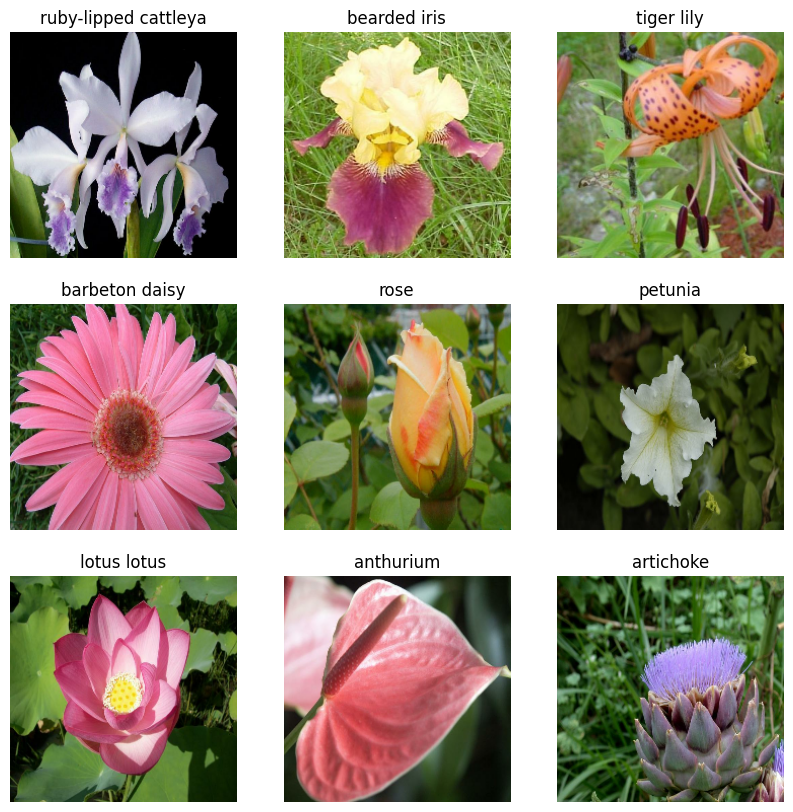

In [26]:
import matplotlib.pyplot as plt
import json

with open(os.path.join(BASE, "cat_to_name.json")) as f:
    cat_to_name = json.load(f)

# Map folder label -> readable name
label_to_name = {i: cat_to_name[class_names[i]] for i in range(len(class_names))}

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        lab = int(labels[i].numpy())
        plt.title(label_to_name[lab])
        plt.axis("off")
plt.show()

In [41]:
import numpy as np
import sys
from pathlib import Path

# Add project root (one level up from the notebook folder)
PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

from src.utils import class_counts, model_summary_stats, plot_confusion_matrix

train_counts = class_counts(train_ds)
val_counts   = class_counts(val_ds)

print("Train class count: min =", min(train_counts.values()), "max =", max(train_counts.values()))
print("Val   class count: min =", min(val_counts.values()),   "max =", max(val_counts.values()))

imbalance_ratio = max(train_counts.values()) / min(train_counts.values())
print("Train imbalance ratio (max/min):", round(imbalance_ratio, 2))

Train class count: min = 27 max = 206
Val   class count: min = 1 max = 28
Train imbalance ratio (max/min): 7.63


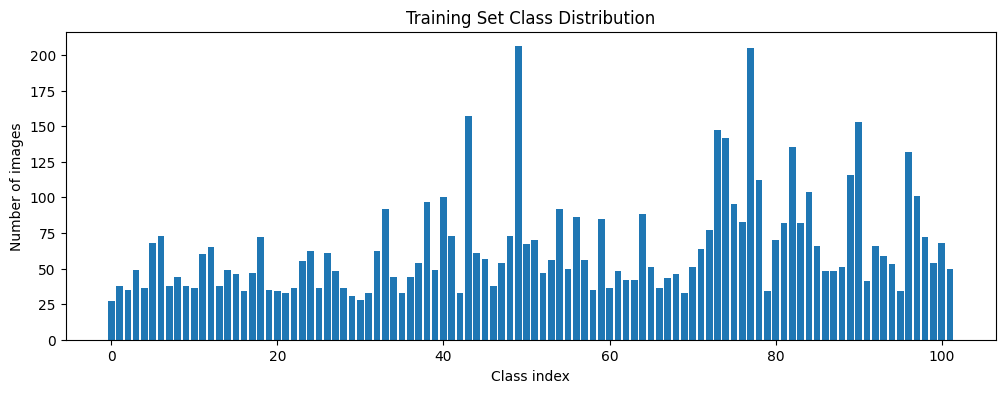

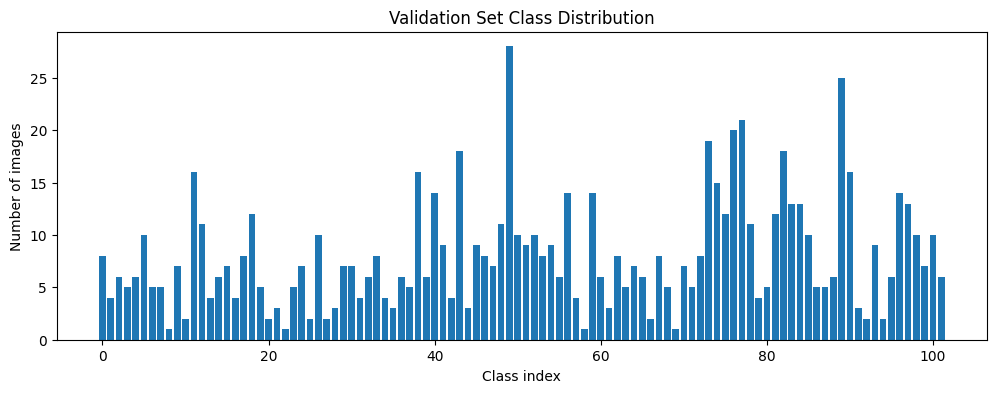

In [33]:
# Class Distribution Visualization

import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(counts, title):
    classes = list(counts.keys())
    values  = list(counts.values())

    plt.figure(figsize=(12,4))
    plt.bar(classes, values)
    plt.title(title)
    plt.xlabel("Class index")
    plt.ylabel("Number of images")
    plt.show()

plot_class_distribution(train_counts, "Training Set Class Distribution")
plot_class_distribution(val_counts,   "Validation Set Class Distribution")

In [36]:
# Applying data augmentation

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
], name="data_augmentation")

print("Data augmentation pipeline created.")

Data augmentation pipeline created.


### 2. Feature Extraction

TypeError: unsupported operand type(s) for /: 'str' and 'str'

### 3. Fine-Tuning

### 4. Comparison & Analysis

### 5.  Bonus